In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [33]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Explorer les données
Voir à quoi les données ressemblent.

In [34]:
cifar10_classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf",
                   "Chien", "Grenouille","Cheval","Bateau","Camion "]

print("Forme de l'ensemble d'entraînement (images) : ", x_train.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) : ", y_train.shape)
print("Forme de l'ensemble de test (images) : ", x_test.shape)
print("Forme de l'ensemble de test (étiquettes) : ", y_test.shape)

Forme de l'ensemble d'entraînement (images) :  (50000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) :  (50000, 1)
Forme de l'ensemble de test (images) :  (10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes) :  (10000, 1)


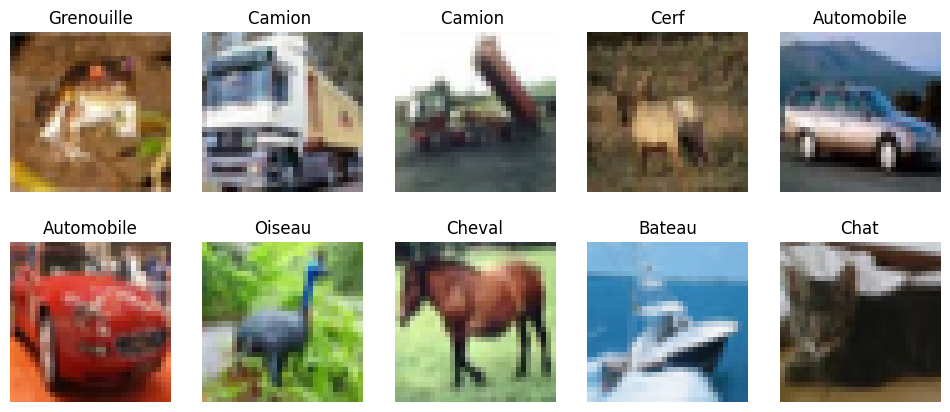

In [35]:
# Afficher quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(12,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.title(cifar10_classes[y_train[i][0]])
  plt.axis('off')
plt.show()

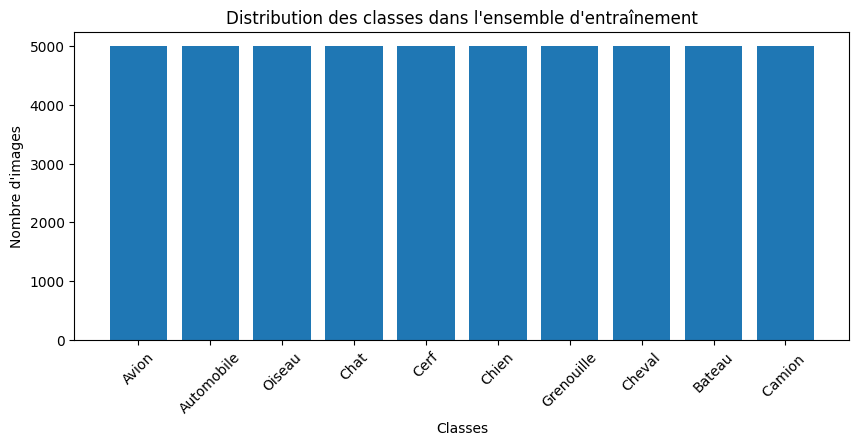

In [36]:
# Afficher la distribution des classes dans l'ensemble de l'entraîneùent
class_distribution = [0]*10
for label in y_train:
  class_distribution[label[0]] += 1

plt.figure(figsize =(10,4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

# 3. Prétraitement des données


In [37]:
# Normaliser les données pour les mettres entre 0 et 1
x_train = x_train.astype('float32')/255.0
y_train = y_train.astype('float32')/255.0

In [38]:
# Transformer les étiquettes en vecteurs one-hote (encodage catégoriel)

# Encodage one-hot des labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [39]:
print("Forme de l'ensemble d'entraînement (images) : ", x_train.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) : ", y_train.shape)
print("Forme de l'ensemble de test (images) : ", x_test.shape)
print("Forme de l'ensemble de test (étiquettes) : ", y_test.shape)
# Normalement rien de change

Forme de l'ensemble d'entraînement (images) :  (50000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) :  (50000, 10)
Forme de l'ensemble de test (images) :  (10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes) :  (10000, 10)


4. Modèle MLP (Perceptron Multi-Couche)
## 4.1 Construction du modèle


In [40]:
# Importer les packages nécéssaires
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définir le modèle MLP pour la classification d'images
model_mlp = keras.Sequential([
    # Aplatir les images 32x32 en un vecteur 1D
    layers.Flatten(input_shape=(32,32,3)),
    # Ajouter une couche cachée de 128 neurones avec une fonction d'activation
    layers.Dense(128, activation='relu'),
    # Ajouter la couche de sortie avec 10 neurones (classes CIFAR-10)
    # 'softmax' c'est utile quand on fait de la classification multi-classe
    layers.Dense(10, activation='softmax')
])

In [44]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques de précision
model_mlp.compile(optimizer='adam', # Utiliser l'optimisateur adam
                  loss='categorical_crossentropy', # Fonction de perte
                  metrics=['accuracy'])

In [42]:
model_mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Entraîner le modèle MLP sur les données d'entraînement
epochs = 100 # Nombre d'époques
batch_size = 32

print(x_train.shape)  # Doit être (num_samples, 32, 32, 3)
print(y_train.shape)  # Doit être (num_samples, 10) après one-hot encoding


# Utilisation de la validation split (20% des données pour la validation)
historique = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluation du modèle sur les données de test
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose = 2)

#Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

(50000, 32, 32, 3)
(50000, 10)
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 1.0000 - loss: 1.0885e-09 - val_accuracy: 1.0000 - val_loss: 1.0064e-06
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 1.0000 - loss: 6.8426e-10 - val_accuracy: 1.0000 - val_loss: 9.1094e-07
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 1.0000 - loss: 4.0316e-10 - val_accuracy: 1.0000 - val_loss: 8.3364e-07
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 1.0000 - loss: 5.4747e-10 - val_accuracy: 1.0000 - val_loss: 7.6790e-07
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 1.0000 - loss: 2.9386e-10 - val_accuracy: 1.0000 - val_loss: 7.0960e-07
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 6.4395e-10 - val_accuracy: 1.0000 - val_loss: 6.6097e-07
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 4.1947e-10 - val_accuracy: 1.0000 - val_loss: 6.1876e-07
Epoch 8